Credits: https://github.com/bansalkanav/Machine_Learning_and_Deep_Learning

# Data Distributions

## What's Covered
1. What is a Data Distribution?
2. Key characteristics of a Data Distributions
3. Types of Distributions
4. Why Study Data Distributions?
5. Importing Libraries and Creating Helper Functions
6. Discrete Distribution
    - Bernoulli Distribution
    - Binomial Distribution
    - Poisson Distribution
    - Multinomial Distribution
    - Conclusion
7. Continuous Distribution
    - Uniform Distribution
    - Gaussian (Normal) Distribution and 68-95-99.7% Rule
	- Exponential Distribution
    - Log Normal Distribution
    - Pareto (Power Law) Distribution
    - Conclusion
8. Case Study
	- Scenario: Setting Up a Garment Store
	- Import the Libraries and Load the Data
    - Domain Knowledge
    - Task to Solve
9. Feature Scaling
    - Min-Max Scaling
    - Standardization (z-transformation)
11. Verify the Type of Distribution - QQ Plot
12. Data Transformation
	- Log Transformation
	- Box Cox Transformation

## What is a Data Distribution?
A data distribution refers to the way in which data values are spread or distributed across a dataset. It provides information about the possible values a variable can take and how frequently each value occurs. Understanding the distribution of data is fundamental in statistics and data analysis, as it forms the basis for making inferences, building models, and drawing conclusions about a population based on a sample.

## Key characteristics of a Data Distributions
1. **Cardinality(nunique) and Unique (For Discrete Columns)**
2. **Count, Min and Max (For Numerical Columns)**
3. **Central Tendency:** This indicates the "center" of the data. Common measures of central tendency include the mean (average), median (middle value), and mode (most frequently occurring value).
4. **Dispersion or Spread:** This describes how spread out the data points are. Measures of dispersion include range, variance, and standard deviation.
5. **Shape:** This refers to the overall pattern or form of the distribution. Common shapes include normal (bell-shaped), skewed (lopsided), and uniform (evenly distributed).


## Types of Distributions
There are two broad categories of Data Distributions:
1. Discrete Distribution (Categorical or Discrete Numerical Columns)  
2. Continuous Distribution (Continuos/Real Numerical Feature)  

Based on **key characteristics** of data distribution, we can further classify them into following types:
1. Discrete Distribution (Categorical or Discrete Numerical Columns)  
    - Bernoulli Distribution
    - Binomial Distribution
    - Poisson Distribution
    - Multinomial Distribution
2. Continuous Distribution (Continuos/Real Numerical Feature)  
    - Uniform Distribution
    - Gaussian (Normal) Distribution
    - Exponential Distribution
    - Log Normal Distribution
    - Pareto (Power Law) Distribution

We will learn the PMFs and PDFs for the above mentioned distributions. The main distinction between PMFs and PDFs is that PMFs give probabilities associated with specific points, while PDFs describe probabilities over intervals.


## Why Study Data Distributions?
Understanding the distribution of data is crucial in a wide range of fields, including statistics, data science, economics, finance, healthcare, and more. It informs decision-making, helps in selecting appropriate statistical tests or models, and provides insights into the underlying patterns and characteristics of a dataset. Following are the benefits of studying data distributions:
> 1. **Outlier and Missing Values** - Outliers are data points that are significantly different from the rest of the data. Knowledge of Data Distribution helps perform a better outlier and missing value treatment.
> 2. **Advance Data Analysis** - Knowledge of data distributions and their PMFs/PDFs can help us with better insight generation from the given data and take data driven decisions.
> 4. **Inferential Statistics** - Knowledge of Distribution can help us select the appropriate Statistical Tests.
> 5. **ML and DL** - It also helps us identify appropriate Algorithms for Data Modelling in ML and DL.

## Importing Libraries and Creating Helper Functions

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating the helper functions for non visual analysis
def discrete_distribution_analysis(data):
    '''
    This function performs a complete statistical 
    analysis of discrete data (categorical and numerical).
    '''
    series = pd.Series(data)
    print(series.agg(['count', 'nunique', 'unique']))
    print('Value Counts: \n', series.value_counts())
    print()


def continuous_distribution_analysis(data):
    '''
    This function performs a complete statistical 
    analysis of continuous numerical data.
    '''
    series = pd.Series(data)
    print(series.agg(['count', 'min', 'max', 'mean', 'median', 'var', 'std', 'skew', 'kurt']).round(2))
    print()

In [3]:
# Creating the helper functions for visual analysis
def discrete_distribution_plot(data):
    '''
    This function performs a complete visual 
    analysis of discrete data (categorical and numerical).
    '''
    fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)
    fig.suptitle("Discrete Distribution Plot")
    
    ax.set_title("Count Plot")
    sns.countplot(x=data, ax=ax)
    
    plt.xticks(rotation=45)
    plt.show()



def continuous_distribution_plot(data):
    '''
    This function performs a complete visual 
    analysis of continuous numerical data.
    '''

    fig, axes = plt.subplots(1, 3, figsize=(8, 3), constrained_layout=True)
    fig.suptitle("Continuous Distribution Plot")
    
    axes[0].set_title("Histogram Plot")
    sns.histplot(data, ax=axes[0])
    
    axes[1].set_title("KDE Plot")
    sns.kdeplot(data, fill=True, ax=axes[1])

    axes[2].set_title("Box Plot")
    sns.boxplot(data, ax=axes[2])

    plt.show()

## Discrete Distributions

### Bernoulli Distribution

The Bernoulli distribution models a random experiment with two possible outcomes, often labeled as "success" and "failure." It is characterized by a single parameter, p, which represents the probability of success.  
**For eg:** 
- Loan Approval - Suppose a bank is considering a loan application. The outcome can be either "Approved" (success) or "Rejected" (failure) based on certain criteria. Let's say the probability of loan approval (p) is 0.8.
> What will be the probabilily of rejection?  
> Ans: ___________
- Student Pass/Fail Outcome in a final exam - Suppose a university is considering a pass/fail criterion for a final exam. The outcome for each student can be either "Pass" (success) or "Fail" (failure) based on a predefined threshold. Probability of a student passing the exam is 0.7 (p).
> What is the probability of student failing the exam?  
> Ans: ___________

**If data follows bernoulli distribution, we represent it like this:**  
\begin{equation}
X \sim B(1, p)
\end{equation}

**Probability Mass Function**
\begin{equation}
    f(x) =
    \left\{
        \begin{array}{cc}
                p & \mathrm{if\ } x=1 \\
                1-p & \mathrm{if\ } x=0 \\
        \end{array} 
    \right.
\end{equation}

In [4]:
def bernoulli_distribution_generator(p, size):
    # Define the number of trials (n) and the probability of success (p)
    return np.random.binomial(n=1, p=p, size=size)

count       10000
nunique         2
unique     [0, 1]
dtype: object
Value Counts: 
 0    7053
1    2947
Name: count, dtype: int64



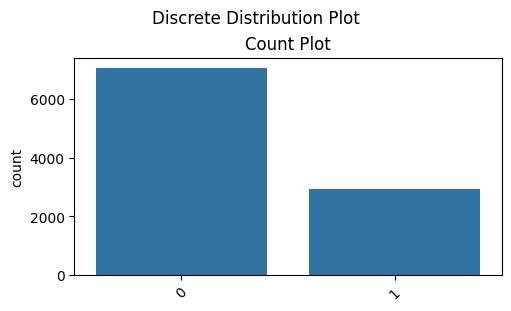

In [5]:
bernoulli_dist = bernoulli_distribution_generator(p=0.30, size=10000)

discrete_distribution_analysis(data=bernoulli_dist)

discrete_distribution_plot(data=bernoulli_dist)

### Binomial Distribution

The binomial distribution models the number of successes (x) in a fixed number of independent Bernoulli trials (n), each with the same probability of success (p). For eg: 
- Number of Loan Approvals in a day - Assuming the bank receives 20 loan applications in a day (i.e. n), and each application has an independent probability of approval of p = 0.8.
> What is the probability of approving exactly 15 loans?  
> Ans: _________
- Success Rate in a Tutoring Program - In a tutoring program, 50 students (i.e. n) are enrolled, and each student has an independent probability of success (p=0.7).
> What is the probability of exactly 30 students succeeding?  
> Ans: __________

**If data follows binomial distribution, we represent it like this:**  
\begin{equation}
\ X \sim B(n, p)
\end{equation}

**Probability Mass Function**
\begin{equation}
    f(x)={n\choose x}(p)^x(1-p)^{n-x}
\end{equation}

**here,** 
\begin{equation}
   {n\choose x}=\frac{n!}{x!(n-x)!}
\end{equation}

In [6]:
def binomial_distribution_generator(n, p, size):
    # Define the number of trials (n) and the probability of success (p)
    return np.random.binomial(n=n, p=p, size=size)

count                            10000
nunique                              9
unique     [2, 4, 3, 6, 1, 0, 7, 5, 8]
dtype: object
Value Counts: 
 3    2732
2    2354
4    2020
1    1170
5    1018
6     360
0     255
7      81
8      10
Name: count, dtype: int64



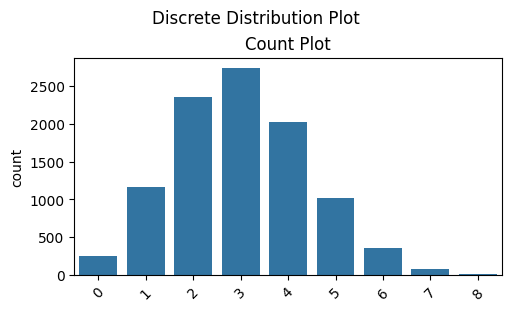

In [7]:
binomial_dist = binomial_distribution_generator(n=10, p=0.30, size=10000)

discrete_distribution_analysis(data=binomial_dist)

discrete_distribution_plot(data=binomial_dist)

### Poisson Distribution

The Poisson distribution models the number of events that occur in a fixed interval of time or space, assuming events occur at a constant average rate (λ) and are independent of the time since the last event. For eg: 
- Customer Arrivals at a Bank Branch every hour - Suppose, on average, a bank branch receives 30 customers per hour. Here  λ=30 (i.e. Average number of customers arriving per hour)
> What is the probability of 40 (i.e. x) customers arriving in the next hour?  
> Ans: _________

- Students Arrival at a Library everyday - Suppose, on average, a university library receives 500 students per day. Here  λ=500 (i.e. Average number of students arriving per day)
> What is the probability of 600 students (i.e. x) arriving in a specific day?  
> Ans: _________


**If data follows poisson distribution, we represent it like this:**
\begin{equation}
\ X \sim P(\lambda)
\end{equation}

**Probability Mass Function**
\begin{equation}
\ f(x) = e^{-\lambda}\frac{\lambda^x}{x!}
\end{equation}

Typically, Poisson Distribution has following characteristics:
1. It should exhibit a right-skewed, unimodal shape.
2. Variance is approximately equal to the mean.

In [8]:
def poisson_distribution_generator(lam, size):
    # Define expected number of events occurring in a fixed-time interval (lam)
    return np.random.poisson(lam=lam, size=size)

count                                                  10000
nunique                                                   41
unique     [26, 35, 27, 37, 21, 20, 22, 33, 31, 38, 25, 3...
dtype: object
Value Counts: 
 31    742
29    730
30    701
27    687
28    687
32    642
33    617
26    581
34    532
25    482
35    467
24    431
36    353
23    352
37    307
22    247
38    246
39    197
21    190
40    148
20    139
41     92
19     90
42     78
43     55
18     43
44     40
17     28
45     18
47     18
16     15
15     15
46     14
49      4
13      3
14      3
48      2
50      1
52      1
51      1
11      1
Name: count, dtype: int64



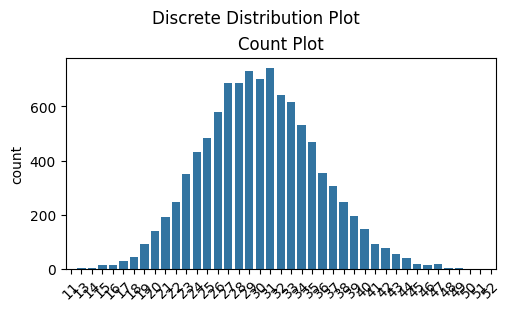

In [9]:
poisson_dist = poisson_distribution_generator(lam=30, size=10000)

discrete_distribution_analysis(data=poisson_dist)

discrete_distribution_plot(data=poisson_dist)

In [10]:
continuous_distribution_analysis(poisson_dist)

count     10000.00
min          11.00
max          52.00
mean         30.06
median       30.00
var          29.80
std           5.46
skew          0.19
kurt         -0.00
dtype: float64



### Multinomial Distribution

If you have a discrete column in your dataset with more than two distinct values (i.e., a cardinality greater than 2), the distribution of this column would be a specific type of discrete probability distribution known as a Multinomial Distribution.

In a multinomial distribution, each observation falls into one of several categories, with each category having a specified probability. In your case, with three distinct values, you have three categories.

### Conclusion

These examples illustrate how each of these distributions can be applied in different scenarios to model random processes with specific characteristics. 
- The Bernoulli distribution can model binary outcomes like pass/fail
- The binomial distribution can model the number of successes in a fixed number of trials (e.g., success in a tutoring program)
- The Poisson distribution can model the occurrence of events (e.g., student arrivals at a library) over a specific time frame.

## Continuous Distribution

### Uniform Distribution
In a uniform distribution, all outcomes are equally likely within a specified range. For eg: 
- Rolling a Fair Six-Sided Die - When rolling a fair six-sided die, each face has an equal probability of 1/6. This is an example of a discrete uniform distribution.
- Random Loan Assignment - In a bank, loans are often assigned to different loan officers for processing. To ensure fairness and impartiality, the bank may use a uniform distribution to randomly assign loans to officers. This process helps distribute the workload evenly among the loan officers, promoting fairness and efficiency in loan processing.

**If data follows uniform distribution, we represent it like this:**
\begin{equation}
\ X \sim U(\alpha, \beta)
\end{equation}

**Probability Density Function**
\begin{equation}
    f(x)=
    \left\{
        \begin{array}{cc}
                \frac{1}{\beta-\alpha} & \mathrm{if\ } \alpha \le x \le \beta \\
                0 & otherwise \\
        \end{array} 
    \right.
\end{equation}

In [11]:
def uniform_distribution_generator(min, max, size):
    return np.random.uniform(low=min, high=max, size=size)

count     10000.00
min          10.01
max          40.00
mean         24.89
median       24.88
var          74.35
std           8.62
skew          0.02
kurt         -1.19
dtype: float64



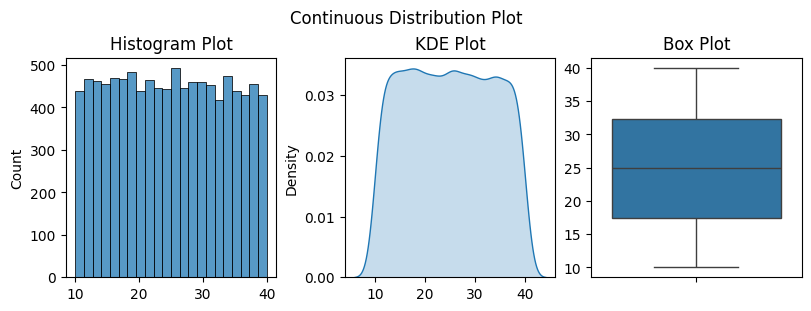

In [12]:
uniform_dist = uniform_distribution_generator(min=10, max=40, size=10000)

continuous_distribution_analysis(data=uniform_dist)

continuous_distribution_plot(data=uniform_dist)

### Normal Distribution and 68-95-99.7% Rule
The normal distribution is characterized by its bell-shaped curve and is widely used in various fields to model a wide range of natural phenomena. This distribution can be described by its mean and standard deviation, providing insights into the central tendency and spread of the data.   
**Important** - If a data follow normal distribution, it will follow **68-95-99.7% Rule**. i.e. 68% of the total data will lie in 1 std range, 95% of the total data will lie in 2 std range and 99.7% of the total data will lie in 3 std range.  

For eg:
- Heights of Adult Males - In a large population of adult males, heights tend to follow a normal distribution. If we measure the heights of 1000 randomly selected adult males, we would likely observe a bell-shaped distribution centered around the average height for adult males.
- ATM Transaction Amounts - The amounts withdrawn from ATMs by customers in a bank can often be modeled using a normal distribution. While some customers withdraw small amounts, there will be a central tendency around an average withdrawal amount. The bank can use this distribution to analyze the distribution of withdrawal amounts, helping them manage cash reserves and plan ATM refills effectively.

**If data follows Normal Distribution, we represent it like this:**
\begin{equation}
\ X \sim N(\mu, \sigma)
\end{equation}

**Probability Density Function**
\begin{equation}
  f(x) = \frac{1}{\sigma\sqrt{2\pi}} 
  \exp\left( -\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{\!2}\,\right)
\end{equation}

In [13]:
def normal_distribution_generator(mean, std, size):
    return np.random.normal(loc=mean, scale=std, size=size)

count     10000.00
min        -144.42
max         178.70
mean         10.23
median       10.20
var        1610.01
std          40.12
skew          0.02
kurt          0.05
dtype: float64



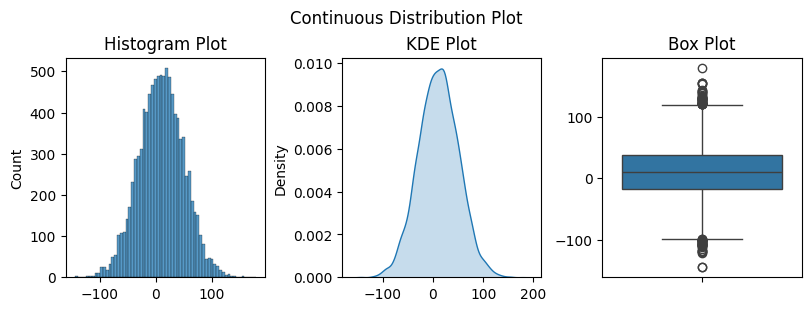

In [14]:
normal_dist = normal_distribution_generator(mean=10, std=40, size=10000)

continuous_distribution_analysis(data=normal_dist)

continuous_distribution_plot(data=normal_dist)

#### 68 - 95 - 99.7 Rule

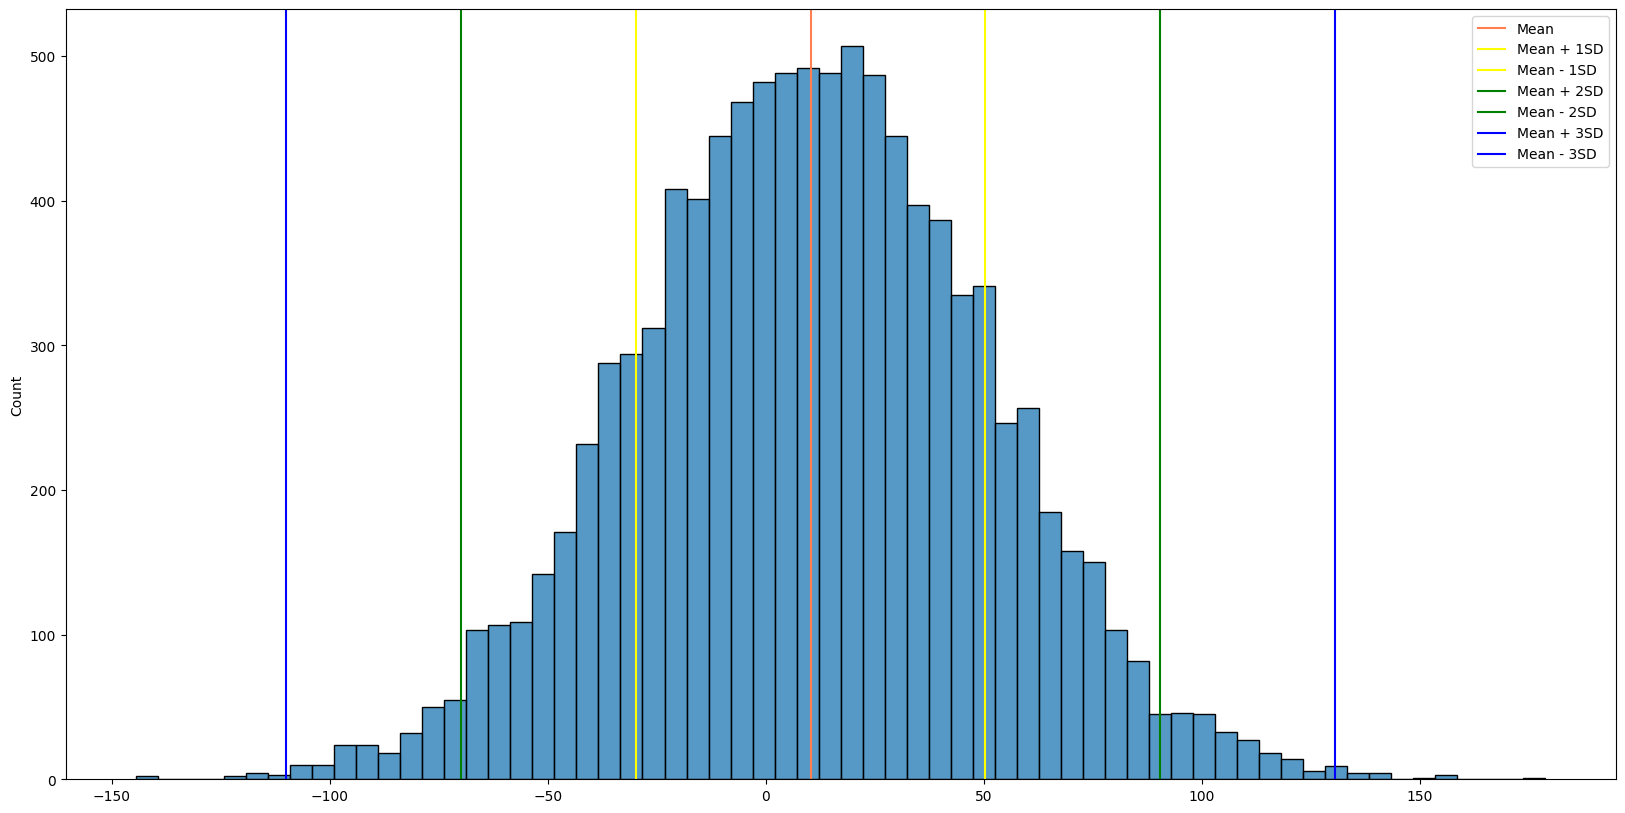

In [15]:
plt.figure(figsize=(20,10))

sns.histplot(normal_dist)

plt.axvline(normal_dist.mean(), color='coral', label='Mean')

plt.axvline(normal_dist.mean() + (1 * normal_dist.std()), color='yellow', label='Mean + 1SD')
plt.axvline(normal_dist.mean() - (1 * normal_dist.std()), color='yellow', label='Mean - 1SD')
plt.axvline(normal_dist.mean() + (2 * normal_dist.std()), color='green', label='Mean + 2SD')
plt.axvline(normal_dist.mean() - (2 * normal_dist.std()), color='green', label='Mean - 2SD')
plt.axvline(normal_dist.mean() + (3 * normal_dist.std()), color='blue', label='Mean + 3SD')
plt.axvline(normal_dist.mean() - (3 * normal_dist.std()), color='blue', label='Mean - 3SD')

plt.legend()

plt.show()

In [16]:
normal_dist < normal_dist.mean() + (1 * normal_dist.std())

array([ True,  True,  True, ...,  True,  True, False])

In [17]:
(normal_dist < normal_dist.mean() + (1 * normal_dist.std())).sum()

8416

In [18]:
def percentage_of_data(data, x):
    left = data.mean() - (x * data.std())
    right = data.mean() + (x * data.std())

    total = data.shape[0]
    portion = ((data > left) & (data < right)).sum()
    
    print(f"Total: {total}")
    print(f"Number of data points between {left.round(2)} and {right.round(2)}: {portion}")
    print(f"Percentage of data points between {left.round(2)} and {right.round(2)}: {portion/total}")

In [19]:
percentage_of_data(normal_dist, 1)

Total: 10000
Number of data points between -29.89 and 50.35: 6840
Percentage of data points between -29.89 and 50.35: 0.684


In [20]:
percentage_of_data(normal_dist, 2)

Total: 10000
Number of data points between -70.02 and 90.47: 9549
Percentage of data points between -70.02 and 90.47: 0.9549


In [21]:
percentage_of_data(normal_dist, 3)

Total: 10000
Number of data points between -110.14 and 130.6: 9975
Percentage of data points between -110.14 and 130.6: 0.9975


### Exponential Distribution

The exponential distribution models the time until an event occurs in a Poisson process, where events occur continuously and independently at a constant average rate (λ). For eg: 
- Time Between Customer Arrivals
- Modeling waiting times, such as the time between phone calls at a call center.
- Reliability engineering, e.g., time until failure of a component.


**If data follows exponential distribution, we represent it like this:**
\begin{equation}
\ X \sim E(\lambda)
\end{equation}


**Probability Density Function**
\begin{equation}
    f(x)=
    \left\{
        \begin{array}{cc}
                \lambda \exp(-\lambda x) & \mathrm{if\ } x > 0 \\
                0 & otherwise \\
        \end{array} 
    \right.
\end{equation}

In [22]:
def exponential_distribution_generator(lam, size):
    # scale(beta) is inverse of lambda parameter
    return np.random.exponential(scale=1/lam, size=size)

count     10000.00
min           0.00
max           1.77
mean          0.20
median        0.14
var           0.04
std           0.20
skew          1.93
kurt          5.17
dtype: float64



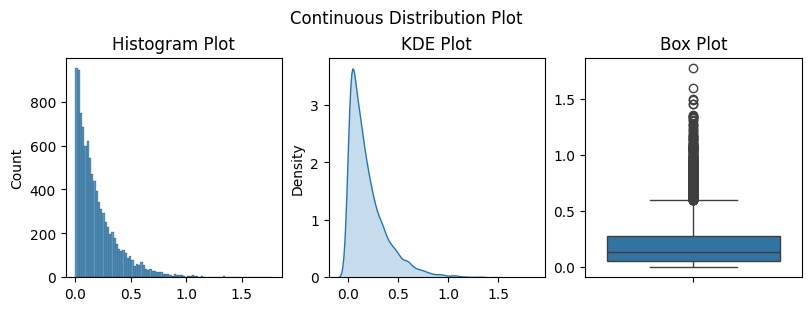

In [23]:
exponential_dist = exponential_distribution_generator(lam=5, size=10000)

continuous_distribution_analysis(data=exponential_dist)

continuous_distribution_plot(data=exponential_dist)

### Log Normal Distribution
It is right-skewed and typically used for variables that are positive and have a long right tail. The log-normal distribution describes a random variable whose logarithm is normally distributed.

**Applications:** 
- Modeling variables like income, asset prices, and biological measurements that cannot be negative.
- In finance, modeling stock prices.

In [24]:
def lognormal_distribution_generator(mean, std, size):
    return np.random.lognormal(mean=mean, sigma=std, size=size)

count     10000.00
min           0.00
max         788.01
mean          7.09
median        1.01
var         874.08
std          29.56
skew         13.72
kurt        261.91
dtype: float64



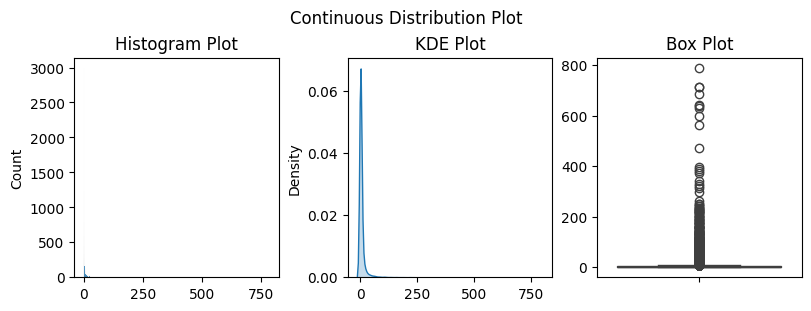

In [25]:
lognormal_dist = lognormal_distribution_generator(mean=0, std=2, size=10000)

continuous_distribution_analysis(data=lognormal_dist)

continuous_distribution_plot(data=lognormal_dist)

### Pareto Distribution (Power Law) - 80:20 Distribution

The power-law distribution, also known as a Pareto distribution, is characterized by a long tail of rare events. It's a heavy-tailed distribution. It describes phenomena where large events are rare but have a substantial impact. It is also known as the “80-20 rule”.

**Applications:**
- Modeling city sizes, where a few cities have a very large population while most have relatively few inhabitants.
- In social sciences, representing the distribution of income or wealth.


In [26]:
def pareto_distribution_generator(alpha, size):
    return np.random.pareto(a=alpha, size=size)

count     10000.00
min           0.00
max         201.51
mean          0.99
median        0.41
var          12.90
std           3.59
skew         36.14
kurt       1771.98
dtype: float64



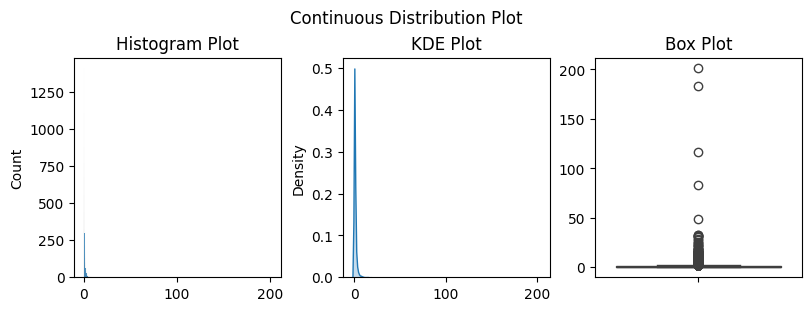

In [27]:
pareto_dist = pareto_distribution_generator(alpha=2, size=10000)

continuous_distribution_analysis(data=pareto_dist)

continuous_distribution_plot(data=pareto_dist)

### Conclusion

These examples demonstrate how these distributions can be applied in the banking domain. The uniform distribution can model equally likely outcomes, the exponential distribution can represent continuous processes like response times, and the normal distribution can describe data with a central tendency, like transaction amounts.






## Case Study

### Scenario: Setting Up a Garment Store
Your friend is embarking on the journey of setting up a garment store. Launching a new business with limited funds demands meticulous planning, resourcefulness, and a sharp understanding of the market. For the initial phase, your friend has decided to focus solely on one product - Jeans, and is investing 100,000 INR in inventory.

**Question: How should the available budget be allocated for inventory?**  
**Answer:** Determining the optimal budget allocation can be a bit challenging without a thorough market analysis. A preliminary suggestion might be to allocate 50,000 INR for both male and female customers. 

**However, what if there's a scarcity of male customers?** 😱

Fortunately, your friend has you, a trusted best friend who also happens to be a successful Data Scientist. Budget allocation can rely on many factors like:  
> **Gender Split:**  
Since your friend is offering jeans, it's essential to consider the gender split in potential customers. This will help in determining how to allocate the budget effectively.
>
> **Sizing Considerations:**   
Different body types and sizes should be taken into account. It might be beneficial to allocate a portion of the budget for a diverse range of sizes.  


Turns out that you have collected some data. Check it out below:

### Import the Libraries and Load the Data

In [28]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("data/height_gender_data.csv")

df.head()

,Unnamed: 0,height,gender
0,0,142.905550,Male
1,1,115.598717,Male
2,2,138.027187,Female
3,3,130.939245,Male
4,4,125.079458,Female


### Clean the data by removing unwanted column

In [30]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

df.head()

,height,gender
0,142.905550,Male
1,115.598717,Male
2,138.027187,Female
3,130.939245,Male
4,125.079458,Female


### Domain Knowledge

**Let's assume you with the help of an expert got the following information about jeans size and height ranges for both the genders. Consider the following chart for better Budget Allocation.**


| Group | Small | Medium | Large |
|:---|:---|:---|:---|
| Female Heights | [120, 136.61] | [136.61 to 153.41] | [154.41 to 170] |
| Male Heights | [99.87, 129.87] | [129.97, 160.07] | [160.07, 190.17]|

### Task to Solve
**Give a proper budget allocation to your friend based on your data analysis skills.**

**Understand that:**
1. Data can be represented in a table with n rows and m columns.
2. Rows - Also known as entities or datapoints.
3. Columns - Also known as features, properties or attributes
4. Each column represents data distribution of a feature (important to understand).
5. These data distribution can be discrete (for categorical and discrete numerical columns) or continuous (for real numerical columns).
6. We can study data distributions by performing univariate non-visual or visual analysis.
7. Non Visual Analysis helps us understand key statistical characteristics of data distributions like count, mean, median, skew, kurtosis, etc...
8. Types of data distribution (i.e. Bernoulli, Binomial, Normal, Exponential, etc...) can be identified by understanding the key characteristics of data distribution.

## Feature Scaling

Feature Scaling, is a process of transforming data into a common format or scale. This ensures that data from different sources or with different units of measurement can be compared or combined more effectively. It's a crucial step in data preprocessing and is used in various fields including statistics, machine learning, and data analysis. There are two types of Feature Scaling techniques:

1. Min-Max Scaling (Normalization)
2. z-transformation (Standardization)

count     10000.00
min        -144.42
max         178.70
mean         10.23
median       10.20
var        1610.01
std          40.12
skew          0.02
kurt          0.05
dtype: float64



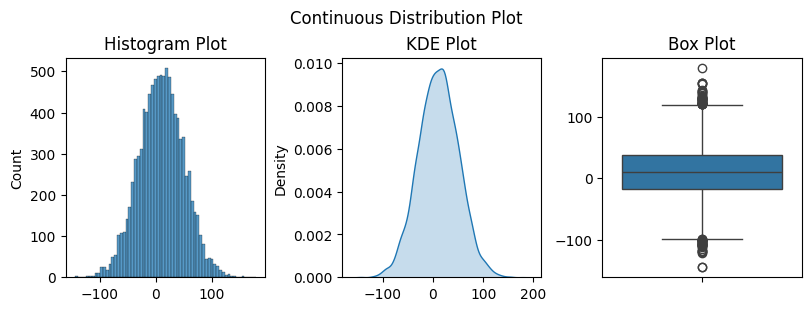

In [37]:
continuous_distribution_analysis(data=normal_dist)

continuous_distribution_plot(data=normal_dist)

count     10000.00
min           0.00
max           1.77
mean          0.20
median        0.14
var           0.04
std           0.20
skew          1.93
kurt          5.17
dtype: float64



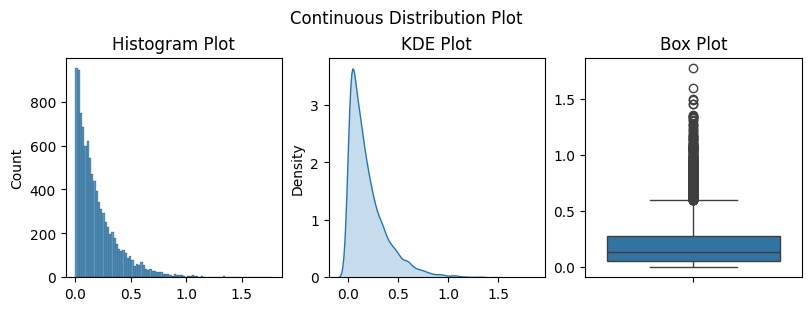

In [43]:
continuous_distribution_analysis(data=exponential_dist)

continuous_distribution_plot(data=exponential_dist)

<Axes: ylabel='Count'>

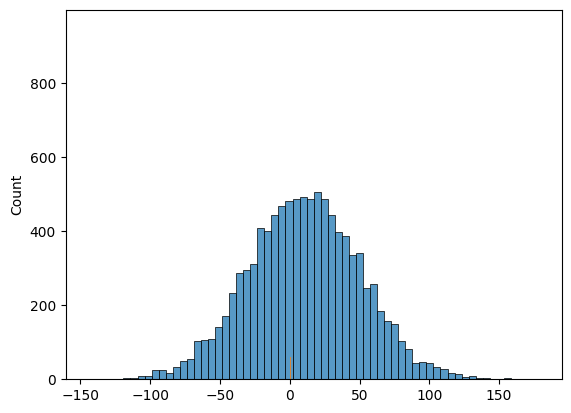

In [44]:
sns.histplot(normal_dist)
sns.histplot(exponential_dist)

### Min-Max Scaling

In [36]:
def min_max_scaler(data):
    min_value = np.min(data)
    max_value = np.max(data)
    return (data - min_value)/(max_value - min_value)

count     10000.00
min           0.00
max           1.00
mean          0.48
median        0.48
var           0.02
std           0.12
skew          0.02
kurt          0.05
dtype: float64



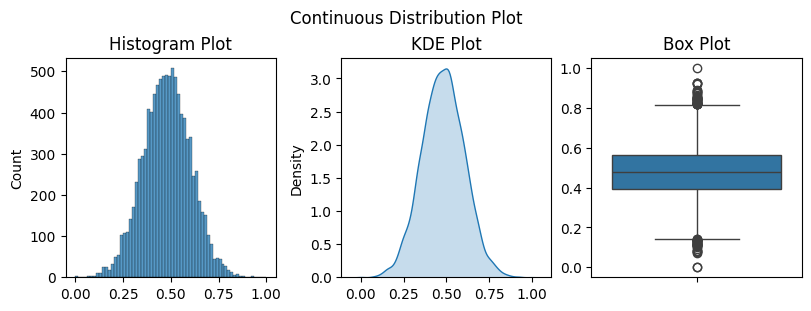

In [45]:
normal_dist_transformed = min_max_scaler(normal_dist)

continuous_distribution_analysis(data=normal_dist_transformed)

continuous_distribution_plot(data=normal_dist_transformed)

count     10000.00
min           0.00
max           1.00
mean          0.11
median        0.08
var           0.01
std           0.11
skew          1.93
kurt          5.17
dtype: float64



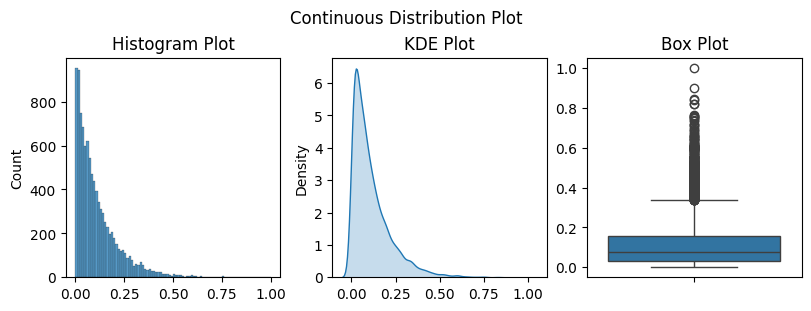

In [46]:
exponential_dist_transformed = min_max_scaler(exponential_dist)

continuous_distribution_analysis(data=exponential_dist_transformed)

continuous_distribution_plot(data=exponential_dist_transformed)

<Axes: ylabel='Count'>

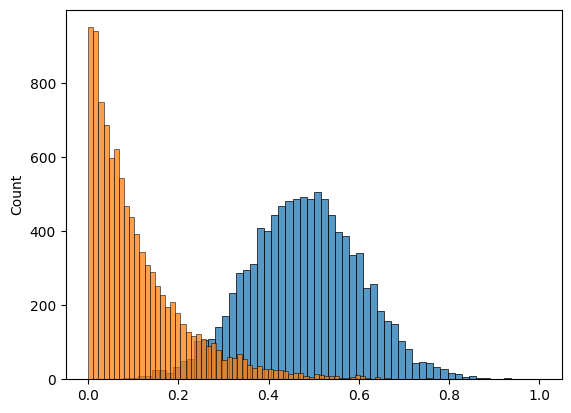

In [47]:
sns.histplot(normal_dist_transformed)
sns.histplot(exponential_dist_transformed)

### z-transformation

In [48]:
def z_transformer(data):
    mean = np.mean(data)
    std = np.max(data)
    return (data - mean)/(std)

count     10000.00
min          -0.87
max           0.94
mean          0.00
median       -0.00
var           0.05
std           0.22
skew          0.02
kurt          0.05
dtype: float64



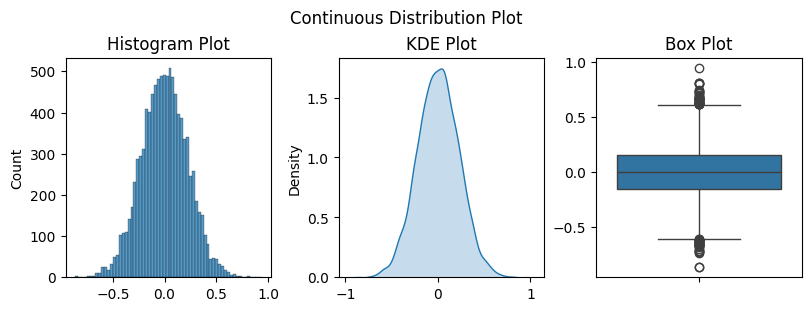

In [49]:
normal_dist_transformed = z_transformer(normal_dist)

continuous_distribution_analysis(data=normal_dist_transformed)

continuous_distribution_plot(data=normal_dist_transformed)

count     10000.00
min          -0.11
max           0.89
mean         -0.00
median       -0.03
var           0.01
std           0.11
skew          1.93
kurt          5.17
dtype: float64



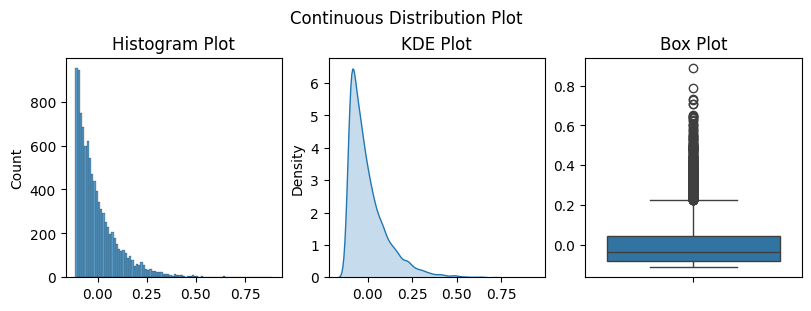

In [50]:
exponential_dist_transformed = z_transformer(exponential_dist)

continuous_distribution_analysis(data=exponential_dist_transformed)

continuous_distribution_plot(data=exponential_dist_transformed)

<Axes: ylabel='Count'>

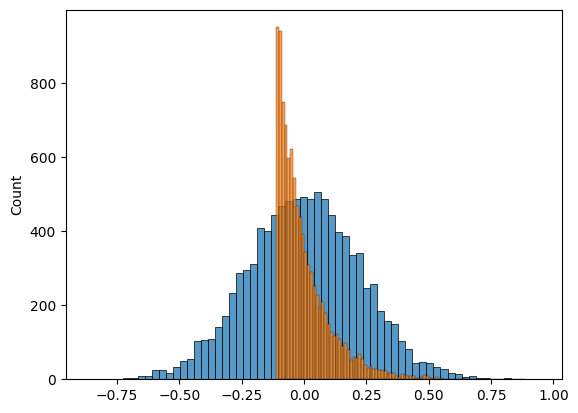

In [51]:
sns.histplot(normal_dist_transformed)
sns.histplot(exponential_dist_transformed)

## Verify the Type of Distribution - QQ Plot

Reference: https://docs.scipy.org/doc/scipy/reference/stats.html

Use the above reference to identify the `dist` parameter.

In [ ]:
! pip install scipy

In [54]:
from scipy import stats

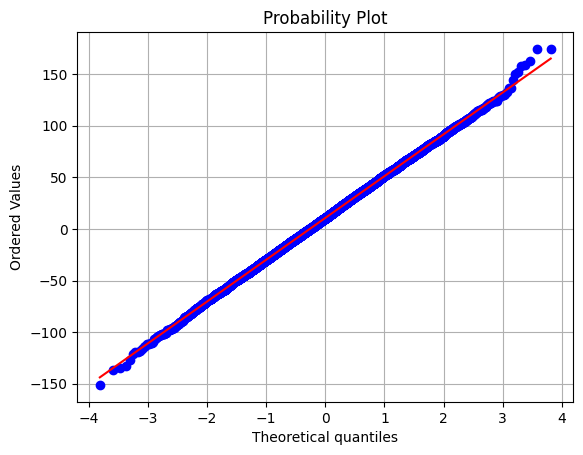

In [55]:
stats.probplot(normal_dist, dist="norm", plot=plt)

plt.grid()

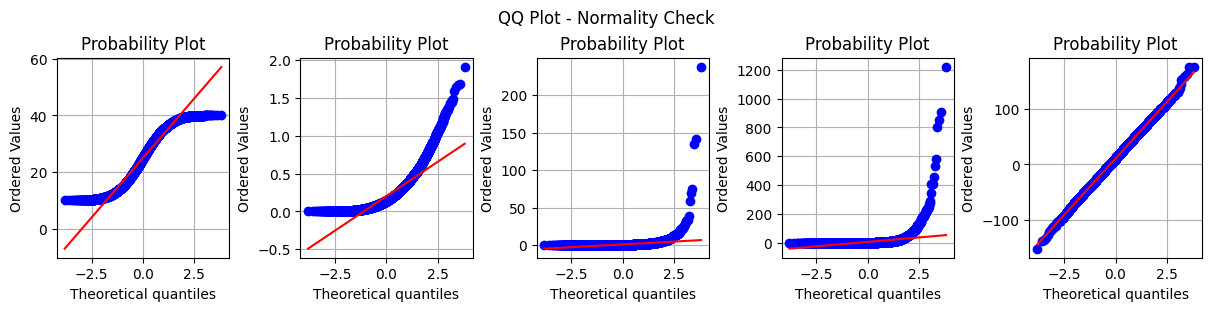

In [61]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3), constrained_layout=True)
fig.suptitle("QQ Plot - Normality Check")

stats.probplot(uniform_dist, dist="norm", plot=axes[0])
axes[0].grid()

stats.probplot(exponential_dist, dist="norm", plot=axes[1])
axes[1].grid()

stats.probplot(pareto_dist, dist="norm", plot=axes[2])
axes[2].grid()

stats.probplot(lognormal_dist, dist="norm", plot=axes[3])
axes[3].grid()

stats.probplot(normal_dist, dist="norm", plot=axes[4])
axes[4].grid()

plt.show()

## Data Transformation 

- Log Transformation
- Box-Cox

### Log Transformation

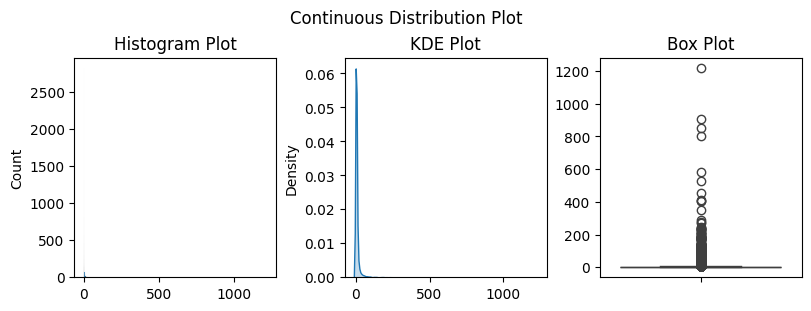

In [68]:
continuous_distribution_plot(data=lognormal_dist)

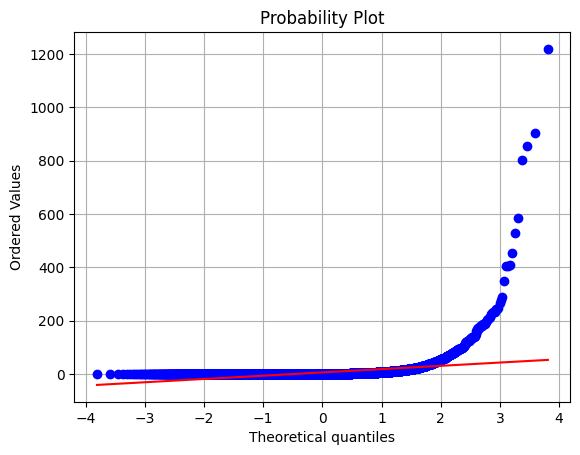

In [73]:
stats.probplot(lognormal_dist, dist="norm", plot=plt)

plt.grid()

In [71]:
lognormal_dist_transformed = np.log(lognormal_dist)

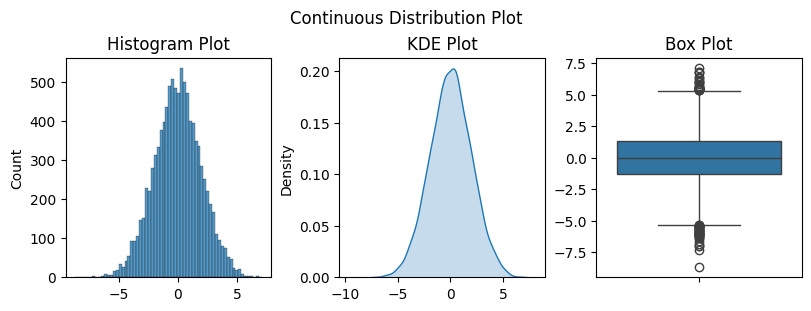

In [72]:
continuous_distribution_plot(data=lognormal_dist_transformed)

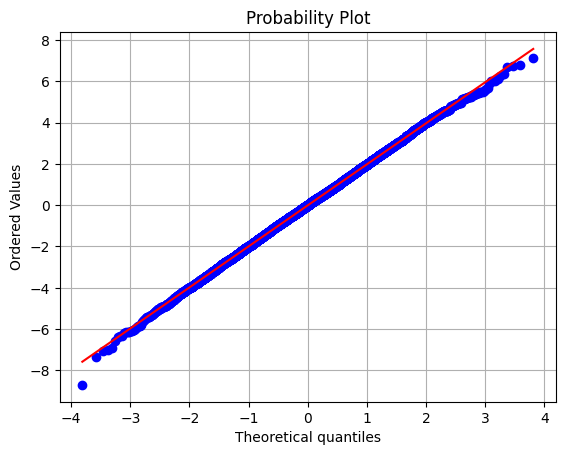

In [90]:
stats.probplot(lognormal_dist_transformed, dist="norm", plot=plt)

plt.grid()

### Box Cox Transformation

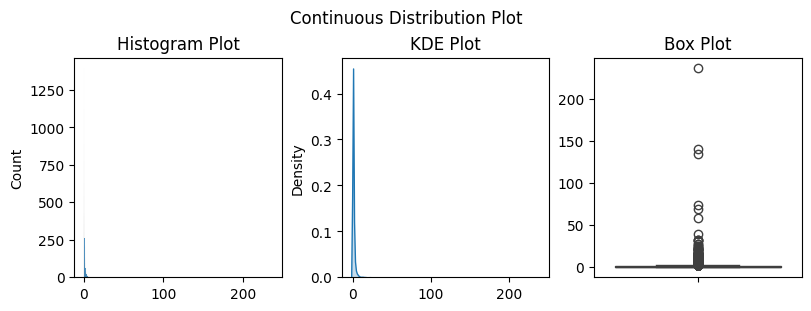

In [62]:
continuous_distribution_plot(data=pareto_dist)

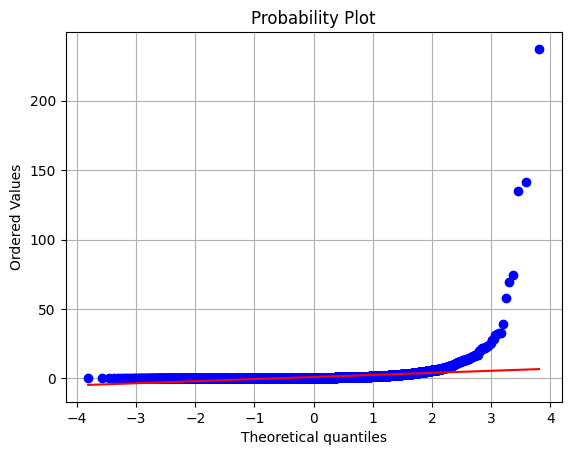

In [63]:
# Normality Test

stats.probplot(pareto_dist, dist="norm", plot=plt)

plt.grid()

In [74]:
# pareto_dist_transformed = tranformed by box-cox, l = Lambda

pareto_dist_transformed, lam = stats.boxcox(pareto_dist)

print(lam)

0.09285366474242492


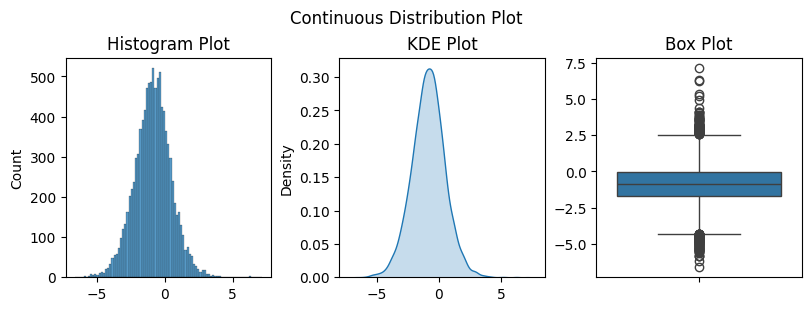

In [76]:
continuous_distribution_plot(data=pareto_dist_transformed)

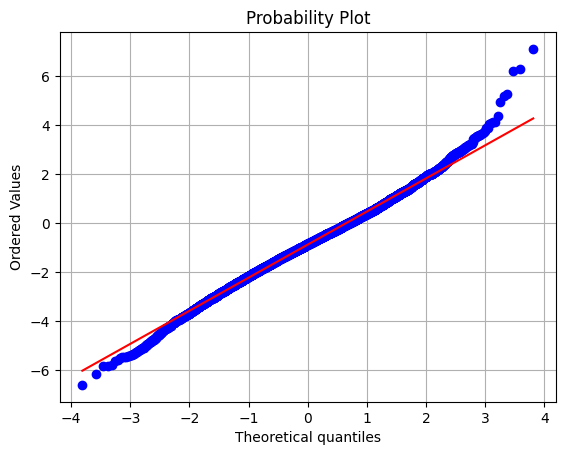

In [75]:
stats.probplot(pareto_dist_transformed, dist="norm", plot=plt)

plt.grid()